# Edge Detection

The thought process behind this is that there are many edges in images that have salt in. if we can enrich the data with the edge data in some way we may improve our accuracy. Following [this](https://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html)

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature, filters
from PIL import Image
import glob
import random

In [63]:
im_paths = glob.glob("../tds-data/train/images/*.png")
im_names = [x.replace("../tds-data/train/images\\","") for x in im_paths]

In [91]:
def show_images(name,sig = 3):
    img = Image.open('../tds-data/train/images/'+name)

    im_arr = np.array(img)
    im_arr = im_arr[:,:,0] # its already grayscale so we can treat it as a 2d arrray
    
    mask = Image.open('../tds-data/train/masks/'+name)
    ma_arr = np.array(mask)
    
    edges1 = feature.canny(im_arr,sigma=sig)
    edges2 = filters.sobel(im_arr)
    
    f,axs = plt.subplots(1, 4, figsize=(20,5))
    axs[0].imshow(im_arr)
    axs[0].set_title("Base")
                 
    axs[1].imshow(edges1)
    axs[1].set_title("Canny edges with sigma ="+str(sig))
    
    axs[2].imshow(edges2)
    axs[2].set_title("Sobel edges")
    
    axs[3].imshow(ma_arr)
    axs[3].set_title("Mask")

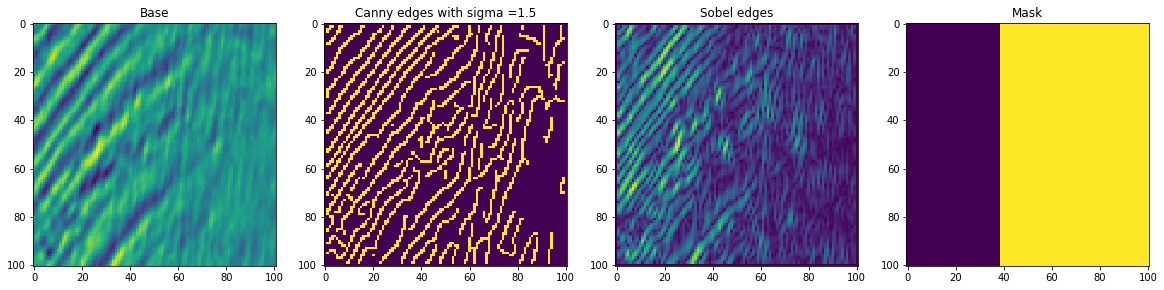

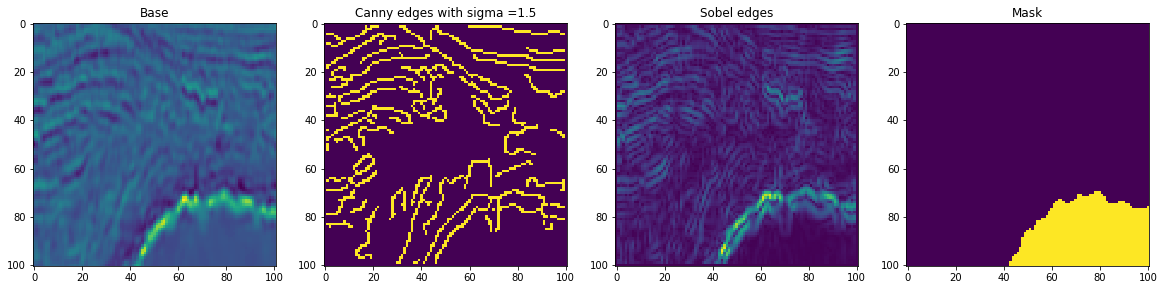

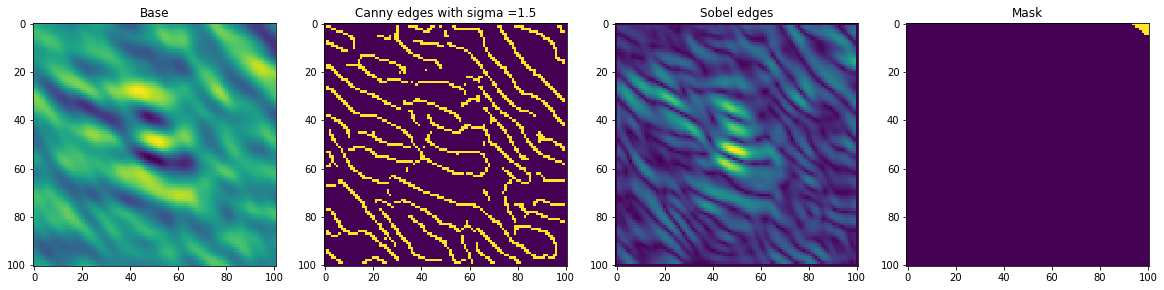

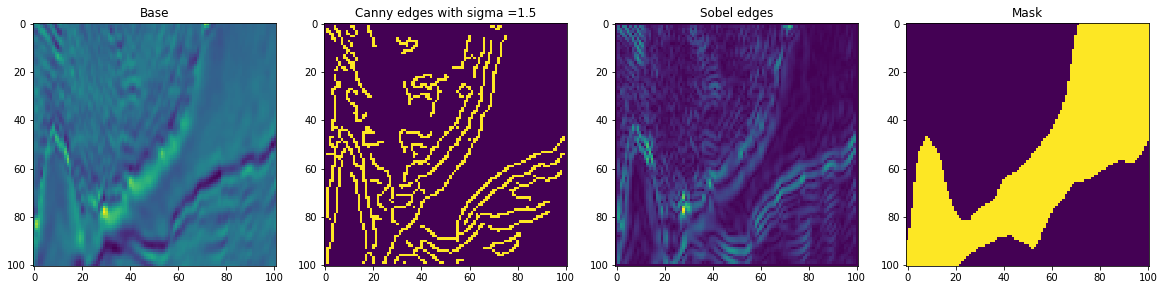

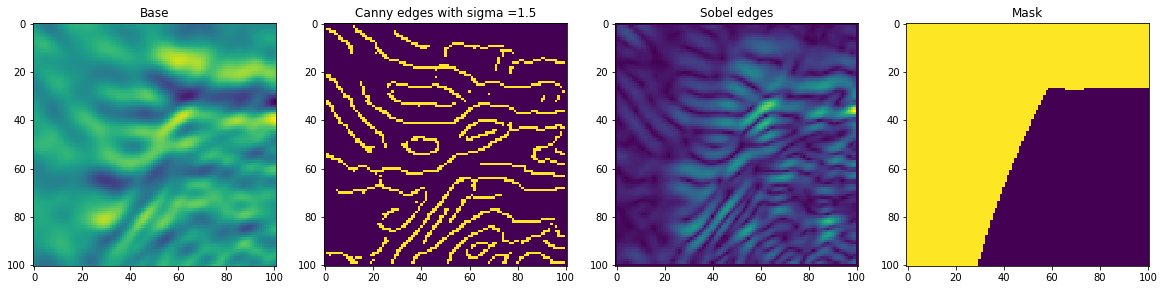

In [94]:
random.seed(0)
for _ in range(5):
    show_images(im_names[random.randint(0,len(im_paths))],1.5)

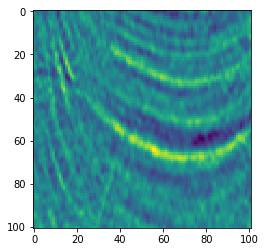

In [22]:
img = Image.open('../tds-data/train/images/00950d1627.png')
arr = np.array(img)
arr = arr[:,:,0] # its already grayscale so we can treat it as a 2d arrray
plt.imshow(arr)

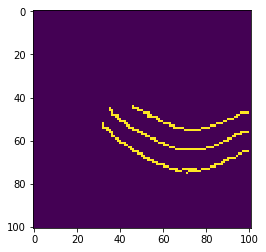

In [28]:
edges1 = feature.canny(arr,sigma=4)
plt.imshow(edges1)